<h2 style=' color: crimson;font-family: Colonna MT; font-weight: 600; font-size: 35px; text-align: Center'>Analysis of Variance (ANOVA)</h2>

---

<h4 style='font-size: 18px;'>1.1: Introduction</h4>

In many data analysis tasks, especially when comparing the effect of one or more categorical factors on a continuous outcome, it's important to determine whether differences in group means are statistically significant. **Analysis of Variance (ANOVA)** is a statistical method used to compare the means of three or more groups. It does this by analyzing the variation within groups and between groups to assess whether the observed differences in sample means are likely due to a real effect or could have occurred by random chance. ANOVA is widely used because it allows for the evaluation of multiple groups simultaneously while controlling the overall error rate.

<h4 style='font-size: 18px;'>1.2: Objectives of This Analysis</h4>

- This analysis aims to guide the process of performing both **One-Way** and **Two-Way ANOVA**, but before doing so, we must first ensure that the necessary assumptions for parametric testing are met. These assumptions include the **normality** of residuals, **homogeneity of variance** (equal variances across groups), and the **independence** of observations. To assess normality, we use the **Shapiro-Wilk test**, while **Levene’s test** is employed to check for homogeneity of variance. Verifying these assumptions is a critical step, as it ensures the validity of the ANOVA results and helps determine whether parametric methods are appropriate or if alternative approaches should be considered.

- Once the assumptions are validated, we proceed with **One-Way ANOVA**, which examines whether there are statistically significant differences in means across three or more independent groups based on a single categorical factor. We then extend the analysis to **Two-Way ANOVA**, which allows us to assess the effect of two independent categorical factors simultaneously, as well as any interaction effects between them. This process not only tests for differences in group means but also provides deeper insights into the structure and relationships within the data. Where significant results are found, further **post-hoc testing** may be conducted to pinpoint which specific group comparisons are responsible for the differences.

In summary, this analysis is structured to methodically check assumptions, apply ANOVA appropriately, and interpret the results in a statistically sound manner, ultimately offering valuable insights into group differences and factor interactions in the dataset.


<h1 style='font-size: 18px;  font-weight: 600'>2.0: Import Required Libraries</h1>

In [94]:
from scipy.stats import shapiro, levene, skew, kurtosis 
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pingouin as pg

# Data manipulation and visualization
import matplotlib.pyplot as plt  
import seaborn as sns  
import pandas as pd  
import numpy as np 
import math  
import re 


import warnings  
warnings.simplefilter("ignore")  
pd.set_option('display.max_columns', 7) 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
print("....Libraries Loaded Successfully....")

....Libraries Loaded Successfully....


<h1 style='font-size: 18px; font-weight: 600'>3.0: Import and Preprocessing Dataset</h1>

In [60]:
filepath = 'Datasets/Fertilizer and Light Exposure Experiment Dataset.csv'
df = pd.read_csv(filepath)
df.sample(10)

,Fertilizer,Light Exposure,Plant Height (cm),...,Flower Count (number),Seed Yield (g),Stomatal Conductance (mmol/m²/s)
18,Synthetic,Full Shade,44.32,...,13.63,4.06,172.74
66,Synthetic,Full Shade,44.12,...,13.31,4.43,179.70
49,Synthetic,Partial Shade,71.46,...,16.69,7.03,269.22
44,Organic,Partial Shade,55.12,...,19.43,6.55,273.88
118,Control,Full Shade,39.60,...,13.72,4.46,186.87
57,Organic,Partial Shade,63.42,...,19.26,6.82,293.84
16,Synthetic,Partial Shade,55.39,...,18.56,7.62,238.47
93,Control,Full Sun,65.53,...,21.58,6.13,250.36
7,Synthetic,Full Sun,81.69,...,19.42,8.73,291.64
91,Organic,Full Sun,83.77,...,28.03,9.19,383.45


<h1 style='font-size: 18px; font-weight: 600'>4.0: Exploratory Data Analysis </h1>

Now, let’s move into Exploratory Data Analysis (EDA) — an important step where we take a closer look at our dataset to understand its structure, identify patterns, detect anomalies, and get a sense of the overall distribution of plant parameters. This will help us gain valuable insights and guide the direction of our statistical tests and interpretations.

<h2 style='font-size: 15px; font-weight: 600'>4.1: Dataset Informartion Overviews</h2>

In [62]:
df.shape

(120, 10)

In [63]:
for column in df.columns.tolist(): print(f"{'-'*15} {column}")

--------------- Fertilizer
--------------- Light Exposure
--------------- Plant Height (cm)
--------------- Leaf Area (cm²)
--------------- Chlorophyll Content (SPAD units)
--------------- Root Length (cm)
--------------- Biomass (g)
--------------- Flower Count (number)
--------------- Seed Yield (g)
--------------- Stomatal Conductance (mmol/m²/s)


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Fertilizer                        120 non-null    object 
 1   Light Exposure                    120 non-null    object 
 2   Plant Height (cm)                 120 non-null    float64
 3   Leaf Area (cm²)                   120 non-null    float64
 4   Chlorophyll Content (SPAD units)  120 non-null    float64
 5   Root Length (cm)                  120 non-null    float64
 6   Biomass (g)                       120 non-null    float64
 7   Flower Count (number)             120 non-null    float64
 8   Seed Yield (g)                    120 non-null    float64
 9   Stomatal Conductance (mmol/m²/s)  120 non-null    float64
dtypes: float64(8), object(2)
memory usage: 9.5+ KB


<h4 style='font-size: 15px; font-weight: 600'>4.1.2: Columns Summary</h4>

In [65]:
def column_summary(df):
    summary_data = []
    
    for col_name in df.columns:
        col_dtype = df[col_name].dtype
        num_of_nulls = df[col_name].isnull().sum()
        num_of_non_nulls = df[col_name].notnull().sum()
        num_of_distinct_values = df[col_name].nunique()
        
        if num_of_distinct_values <= 10:
            distinct_values_counts = df[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = df[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })
    
    summary_df = pd.DataFrame(summary_data)
    return summary_df


summary_df = column_summary(df)
display(summary_df)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,Fertilizer,object,0,120,3,"{'Control': 41, 'Synthetic': 40, 'Organic': 39}"
1,Light Exposure,object,0,120,3,"{'Full Shade': 44, 'Full Sun': 40, 'Partial Sh..."
2,Plant Height (cm),float64,0,120,120,"{58.56151388665052: 1, 46.696826238466286: 1, ..."
3,Leaf Area (cm²),float64,0,120,120,"{185.73856643236132: 1, 138.7980608962804: 1, ..."
4,Chlorophyll Content (SPAD units),float64,0,120,120,"{46.5196207922374: 1, 34.69363266870892: 1, 51..."
5,Root Length (cm),float64,0,120,120,"{24.31891050096943: 1, 17.6585349528435: 1, 33..."
6,Biomass (g),float64,0,120,120,"{11.994074041165357: 1, 8.667791843721698: 1, ..."
7,Flower Count (number),float64,0,120,120,"{19.53594616947752: 1, 15.366158832462084: 1, ..."
8,Seed Yield (g),float64,0,120,120,"{6.687959618540082: 1, 6.165373569255893: 1, 8..."
9,Stomatal Conductance (mmol/m²/s),float64,0,120,120,"{242.41380014645895: 1, 233.65862057163417: 1,..."


<h4 style='font-size: 15px; font-weight: 600'>4.1.3: Handling Duplicates Values</h4>

In [66]:
def handle_duplicates(df):
    duplicate_count = df.duplicated().sum()
    if duplicate_count > 0:
        df.drop_duplicates(inplace=True)
        print(f"Found and removed {duplicate_count} duplicate rows successfully.")
    else:
        print("No duplicate rows found in the dataset.")

handle_duplicates(df)

No duplicate rows found in the dataset.


<h4 style='font-size: 15px;  font-weight: 600'>4.1.4: Checking Missing Values</h4>

Checking for missing values is a crucial step in data analysis to assess the completeness and reliability of the dataset. This involves identifying any columns with null or empty entries, which may affect the accuracy of statistical models.

In [67]:
def Missig_values_info(df):   
    isna_df = df.isna().sum().reset_index(name='Missing Values Counts')
    isna_df['Proportions (%)'] = isna_df['Missing Values Counts']/len(df)*100
    return isna_df
    
isna_df = Missig_values_info(df)
isna_df

,index,Missing Values Counts,Proportions (%)
0,Fertilizer,0,0.00
1,Light Exposure,0,0.00
2,Plant Height (cm),0,0.00
3,Leaf Area (cm²),0,0.00
4,Chlorophyll Content (SPAD units),0,0.00
5,Root Length (cm),0,0.00
6,Biomass (g),0,0.00
7,Flower Count (number),0,0.00
8,Seed Yield (g),0,0.00
9,Stomatal Conductance (mmol/m²/s),0,0.00


<h4 style='font-size: 15px;  font-weight: 600'>4.1.5: Exploring Invalid Entries Dtypes</h4>

Exploring invalid entries in data types involves identifying values that do not match the expected format or category within each column. This includes detecting inconsistencies such as numerical values in categorical fields, incorrect data formats, or unexpected symbols and typos. Invalid entries can lead to errors in analysis and model performance, making it essential to standardize data types and correct anomalies.

In [68]:
def simplify_dtype(dtype):
    if dtype in (int, float, np.number): return 'Numeric'
    elif np.issubdtype(dtype, np.datetime64): return 'Datetime'
    elif dtype == str: return 'String'
    elif dtype == type(None): return 'Missing'
    else: return 'Other'

def analyze_column_dtypes(df):
    all_dtypes = {'Numeric', 'Datetime', 'String', 'Missing', 'Other'}
    results = pd.DataFrame(index=df.columns, columns=list(all_dtypes), dtype=object).fillna('-')
    
    for column in df.columns:
        dtypes = df[column].apply(lambda x: simplify_dtype(type(x))).value_counts()
        percentages = (dtypes / len(df)) * 100
        for dtype, percent in percentages.items():
            if percent > 0:
                results.at[column, dtype] = f'{percent:.2f}%'  # Add % sign and format to 2 decimal places
            else:
                results.at[column, dtype] = '-'  # Add dash for 0%
    return results

results = analyze_column_dtypes(df)
display(results)

,String,Datetime,Other,Missing,Numeric
Fertilizer,100.00%,-,-,-,-
Light Exposure,100.00%,-,-,-,-
Plant Height (cm),-,-,-,-,100.00%
Leaf Area (cm²),-,-,-,-,100.00%
Chlorophyll Content (SPAD units),-,-,-,-,100.00%
Root Length (cm),-,-,-,-,100.00%
Biomass (g),-,-,-,-,100.00%
Flower Count (number),-,-,-,-,100.00%
Seed Yield (g),-,-,-,-,100.00%
Stomatal Conductance (mmol/m²/s),-,-,-,-,100.00%


<h4 style='font-size: 15px;  font-weight: 600'>4.1.6: Renaming Columns</h4>

When working with data, especially in statistical tests like ANOVA, column names with special characters or spaces can cause errors. To avoid this, we can clean the column names by converting them to lowercase, replacing any special characters (such as punctuation) with underscores, and ensuring there are no spaces. This makes the column names consistent and compatible with most analysis functions, preventing errors during data processing. The renaming process is automatic, making it easy to handle datasets with potentially problematic column names.

In [76]:
def rename(text): return re.sub(r'[^a-zA-Z]', "", text)

test_df = df.copy()
rename_map = {col: rename(col) for col in df.columns}
test_df = test_df.rename(columns=rename_map)
rename_df = pd.DataFrame({'Original Column Name': list(rename_map.keys()), 'Renamed Column Name': list(rename_map.values())})
display(rename_df)

,Original Column Name,Renamed Column Name
0,Fertilizer,Fertilizer
1,Light Exposure,LightExposure
2,Plant Height (cm),PlantHeightcm
3,Leaf Area (cm²),LeafAreacm
4,Chlorophyll Content (SPAD units),ChlorophyllContentSPADunits
5,Root Length (cm),RootLengthcm
6,Biomass (g),Biomassg
7,Flower Count (number),FlowerCountnumber
8,Seed Yield (g),SeedYieldg
9,Stomatal Conductance (mmol/m²/s),StomatalConductancemmolms


<h2 style='font-size: 17px;  font-weight: 600'>4.2: Detection and Handling Outliers</h2>

An outlier is a data point that significantly deviates from the rest of the dataset, appearing as an unusually high or low value. Outliers may arise from errors, data entry mistakes, or natural variations, and can distort statistical analysis and machine learning models. To maintain data integrity, outliers should be detected using methods like Z-scores, IQR, or visual tools (e.g., box plots), and then handled appropriately.

<h4 style='font-size: 15px;  font-weight: 600'>4.2.1: Visualize Outliers Using Boxplots</h4>

To gain a more visual and intuitive understanding of how outliers are distributed, we can use **boxplots**. Boxplots not only show the spread and center of the data but also clearly highlight outliers as individual points outside the whiskers, making it easy to see which variables and groups have more extreme values.

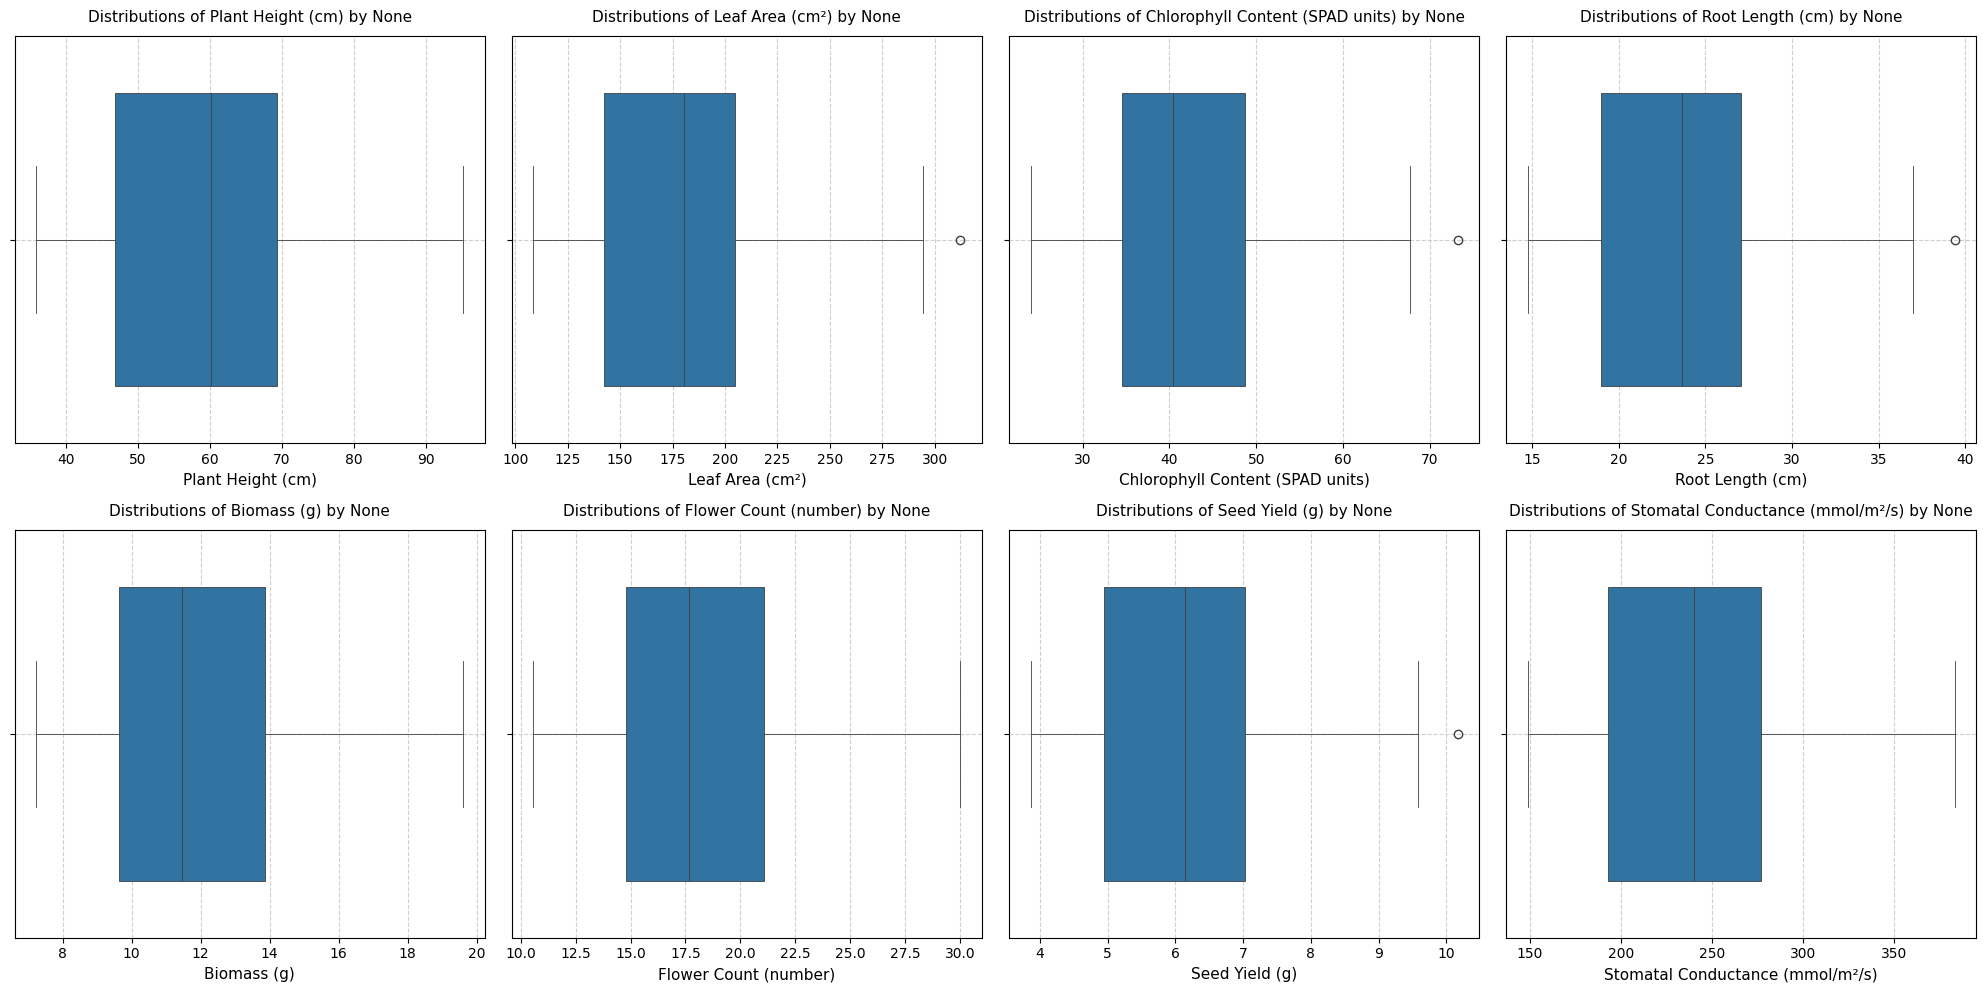

In [19]:
def Boxplot(df, Variables, group=None):
    num_variables = len(Variables)
    rows = math.ceil(num_variables / 3)
    cols = min(num_variables, 4)
    
    fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 5*rows))
    plt.rcParams.update({'font.family': 'Dubai', 'font.style': 'normal', 'font.size': 11 })
    axes = axes.flatten() if num_variables > 1 else [axes]
    
    for idx, column in enumerate(Variables):
        sns.boxplot(data=df, x=df[column], fill=True, gap=0.1, ax=axes[idx], hue=group, linewidth=0.6)   
        axes[idx].set_title(f"Distributions of {column} by {group}", fontsize=11, pad=10)
        axes[idx].set_xlabel(column, fontsize=11)
        axes[idx].grid(linestyle='--', alpha=0.6)
        #axes[idx].legend(frameon=False)
    
    for idx in range(num_variables, len(axes)):
        fig.delaxes(axes[idx])
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

Variables = df.select_dtypes(include=[np.number]).columns
Boxplot(df, Variables=Variables)

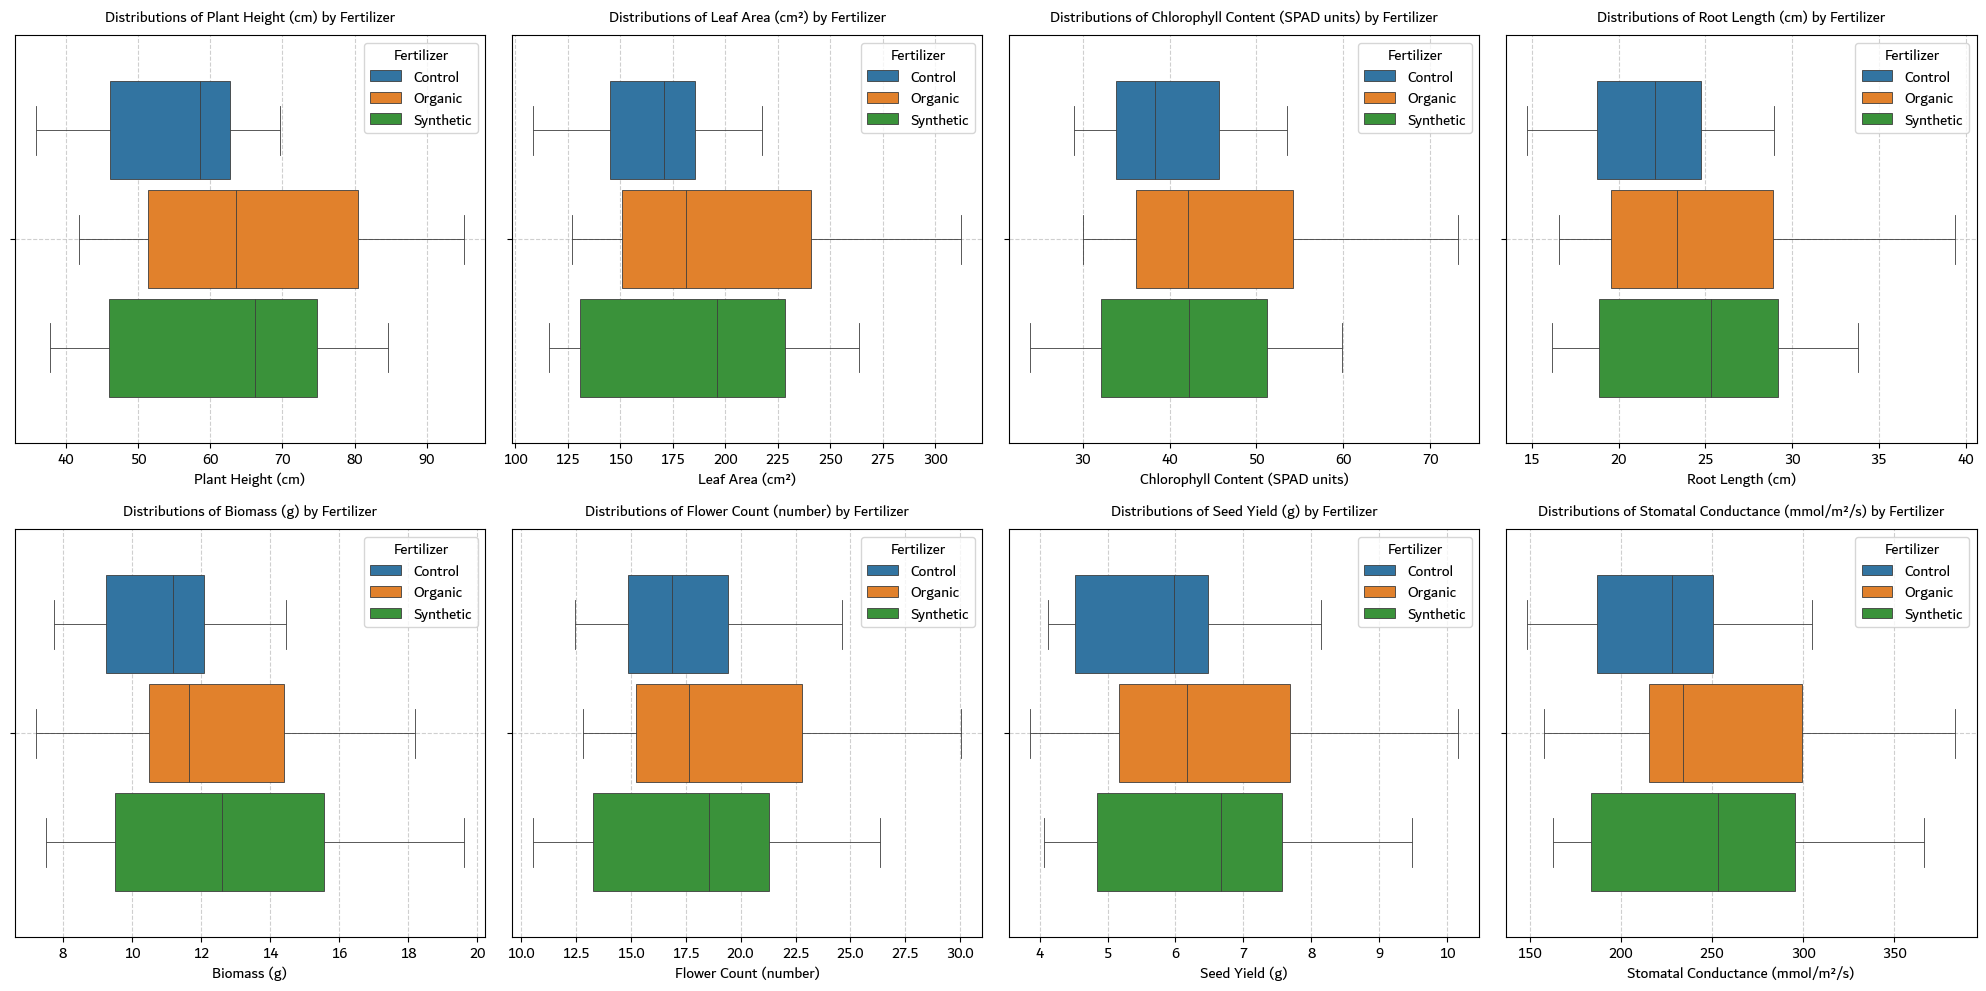

In [77]:
Variables = df.select_dtypes(include=[np.number]).columns
Boxplot(df, Variables=Variables, group='Fertilizer')

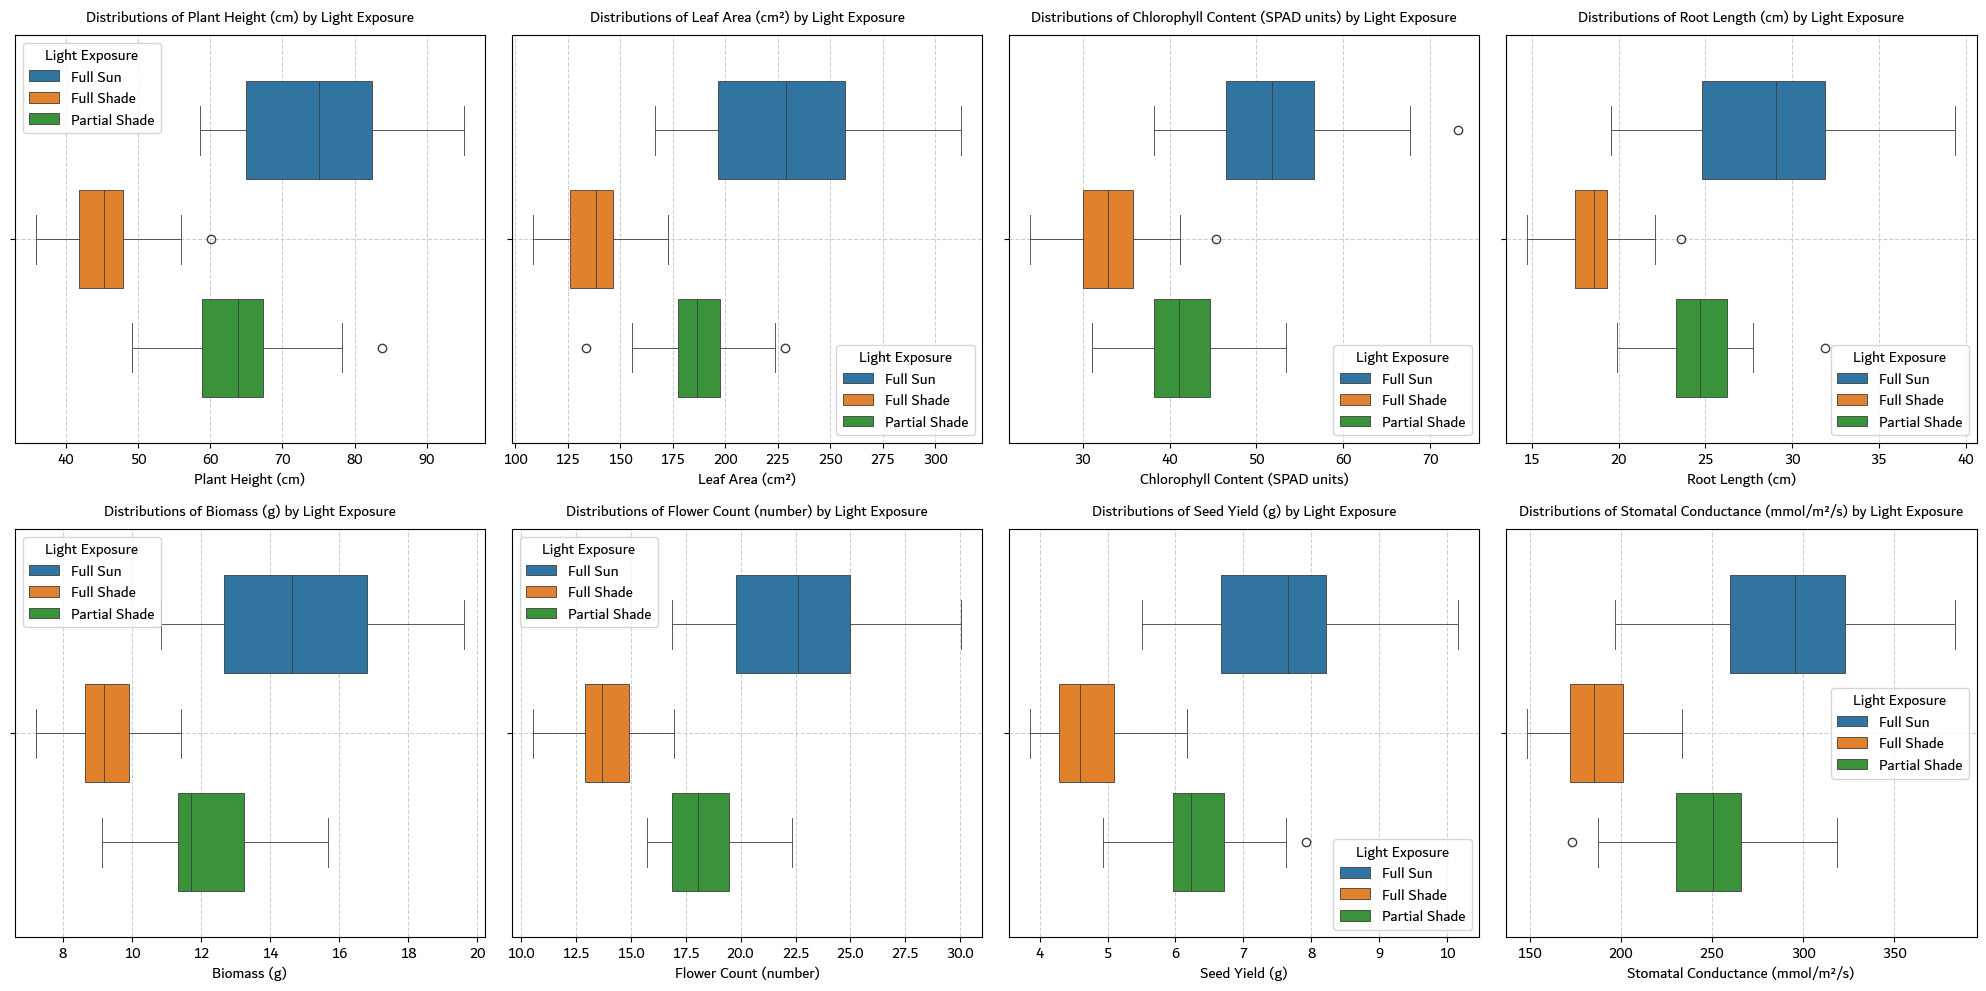

In [78]:
Variables = df.select_dtypes(include=[np.number]).columns
Boxplot(df, Variables=Variables, group='Light Exposure')

<h4 style='font-size: 15px;  font-weight: 600'>4.2.2: Explore Outlier Anomalies Using the IQR Method</h4>

Now, let’s explore outliers in our data using the Interquartile Range (IQR) method. This approach helps us identify extreme values by checking which data points fall far below or above the typical range for each variable. By detecting these anomalies, both overall and within groups, we can better understand the data’s variability and decide if any values need closer attention or cleaning.

In [80]:
from Scripts.outlier_handling import outlier_detection_iqr
outliers_overall = outlier_detection_iqr(df)
display(outliers_overall.T)

,Overall
Plant Height (cm),0
Leaf Area (cm²),1
Chlorophyll Content (SPAD units),1
Root Length (cm),1
Biomass (g),0
Flower Count (number),0
Seed Yield (g),1
Stomatal Conductance (mmol/m²/s),0
Total Observations,120


The current implementation only returns the counts and proportions of outliers in the dataset, but it doesn’t show which specific groups those outliers belong to. To get a clearer picture, we can create plots that compare outlier distributions across groups, helping us identify which groups are most affected.

In [79]:
outliers_by_region = outlier_detection_iqr(df, group_col="Fertilizer")
display(outliers_by_region.T)

Fertilizer,Control,Organic,Synthetic
Plant Height (cm),0,0,0
Leaf Area (cm²),0,0,0
Chlorophyll Content (SPAD units),0,0,0
Root Length (cm),0,0,0
Biomass (g),0,0,0
Flower Count (number),0,0,0
Seed Yield (g),0,0,0
Stomatal Conductance (mmol/m²/s),0,0,0
Total Observations,41,39,40


In [81]:
outliers_by_region = outlier_detection_iqr(df, group_col="Light Exposure")
display(outliers_by_region.T)

Light Exposure,Full Shade,Full Sun,Partial Shade
Plant Height (cm),1,0,1
Leaf Area (cm²),0,0,2
Chlorophyll Content (SPAD units),1,1,0
Root Length (cm),1,0,1
Biomass (g),0,0,0
Flower Count (number),0,0,0
Seed Yield (g),0,0,1
Stomatal Conductance (mmol/m²/s),0,0,1
Total Observations,44,40,36


<h2 style='font-size: 17px; font-weight: 600'>4.3: Statistic Description of The Datasets</h2>

Let's take a moment to quickly explore some essential statistics of our dataset. By using the `describe()` function in pandas, we can generate a summary of key metrics for each numerical column in the dataset. This gives us a bird's-eye view of the data, helping us understand the general distribution and characteristics of the values.

In [82]:
summary_stats = df.describe().T.reset_index()
summary_stats

,index,count,mean,...,50%,75%,max
0,Plant Height (cm),120.00,60.58,...,60.18,69.33,95.14
1,Leaf Area (cm²),120.00,181.90,...,180.71,205.00,312.30
2,Chlorophyll Content (SPAD units),120.00,42.03,...,40.37,48.66,73.21
3,Root Length (cm),120.00,23.86,...,23.64,27.07,39.40
4,Biomass (g),120.00,11.97,...,11.45,13.87,19.61
5,Flower Count (number),120.00,18.18,...,17.64,21.08,30.03
6,Seed Yield (g),120.00,6.16,...,6.14,7.03,10.16
7,Stomatal Conductance (mmol/m²/s),120.00,241.68,...,240.25,276.74,383.45


<h4 style='font-size: 15px; font-weight: 600'>4.3.1:  Distribution of Continuous variables</h4>

Let’s explore the distribution of continuous variables in our dataset by examining key statistics. The **Mean** gives us the average value, while the **Median** provides the middle value, offering a more robust measure against outliers. The **Mode** identifies the most frequent value. **Standard Deviation** and **Variance** show how much the data deviates from the mean, with larger values indicating greater spread. The **Range** reveals the difference between the maximum and minimum values, while **Skewness** measures the symmetry of the distribution. Lastly, **Kurtosis** tells us about the presence of outliers by analyzing the "tailedness" of the distribution. Together, these metrics give us a comprehensive view of how the data is distributed and guide us in identifying any potential issues like skewness or outliers.

In [28]:
def compute_overall_distribution_stats(df):
    results = []
    for col in df.select_dtypes(include=[np.number]).columns:
        mean = df[col].mean()
        median = df[col].median()
        mode = df[col].mode().iloc[0] if not df[col].mode().empty else np.nan
        std_dev = df[col].std()
        variance = df[col].var()
        value_range = df[col].max() - df[col].min()
        skewness_val = skew(df[col], nan_policy='omit')  # Skewness
        kurtosis_val = kurtosis(df[col], nan_policy='omit')  # Kurtosis


        results.append({
            'Parameter': col,
            'Mean': mean,
            'Median': median,
            'Mode': mode,
            'Standard Deviation': std_dev,
            'Variance': variance,
            'Range': value_range,
            'Skewness': skewness_val,
            'Kurtosis': kurtosis_val
        })

    
    result_df = pd.DataFrame(results)
    return result_df

pd.set_option('display.max_columns', 10) 
Continuous_variables_distribution = compute_overall_distribution_stats(df)
Continuous_variables_distribution

,Parameter,Mean,Median,Mode,Standard Deviation,Variance,Range,Skewness,Kurtosis
0,Plant Height (cm),60.575132,60.182570,35.886858,14.929771,222.898073,59.256338,0.374563,-0.733433
1,Leaf Area (cm²),181.903933,180.705051,108.646815,45.934594,2109.986936,203.657464,0.560184,-0.316848
2,Chlorophyll Content (SPAD units),42.025131,40.366346,23.988055,9.863651,97.291602,49.223901,0.588653,-0.169488
3,Root Length (cm),23.858690,23.640302,14.751212,5.435854,29.548505,24.647956,0.617493,-0.217268
4,Biomass (g),11.968973,11.454981,7.230082,2.886389,8.331239,12.384359,0.595402,-0.481665
5,Flower Count (number),18.183565,17.643617,10.574227,4.427504,19.602792,19.452704,0.618590,-0.261857
6,Seed Yield (g),6.164888,6.139640,3.861591,1.487739,2.213368,6.302823,0.503819,-0.505065
7,Stomatal Conductance (mmol/m²/s),241.682592,240.245736,148.685152,55.735774,3106.476523,234.762908,0.413136,-0.580308


<h4 style='font-size: 15px; font-weight: 600'>4.3.2: Group-wise Distribution of Continuous variables</h4>

The function below computes these statistics for each numerical column in the dataset, grouped by the values in the specified `group_column`. The result is returned in a DataFrame where each row corresponds to a group and contains the calculated statistics for each numerical column. This function is useful for analyzing how the distribution of data varies across different groups within a dataset.

In [85]:
def compute_group_distribution_stats(df, group_column):
    results = []
    grouped = df.groupby(group_column)
    for col in df.select_dtypes(include=[np.number]).columns:
        if col != group_column:
            for group_name, group_data in grouped:
                mean = group_data[col].mean()
                median = group_data[col].median()
                mode = group_data[col].mode().iloc[0] if not group_data[col].mode().empty else np.nan
                std_dev = group_data[col].std()
                variance = group_data[col].var()
                cv = group_data[col].std() / group_data[col].mean() * 100  # Coefficient of Variation
                value_range = group_data[col].max() - group_data[col].min()
                
        
                skewness_val = skew(group_data[col], nan_policy='omit')  # Skewness
                kurtosis_val = kurtosis(group_data[col], nan_policy='omit')  # Kurtosis
                
                
                n = len(group_data[col])  # Sample size
                sem = std_dev / np.sqrt(n) if n > 1 else np.nan  # Standard error of the mean

                # Append the results to the list
                results.append({
                    group_column: group_name,
                    'Variables': col,
                    'Mean': mean,
                    'SEM': sem,
                    'Median': median,
                    'Mode': mode,
                    'Standard Deviation': std_dev,
                    'Variance': variance,
                    'Coefficient of Variation': cv,
                    'Range': value_range,
                    'Skewness': skewness_val,
                    'Kurtosis': kurtosis_val,
                })

    result_df = pd.DataFrame(results)
    return result_df

group_column = 'Fertilizer'
pd.set_option('display.max_columns', 9) 
results = compute_group_distribution_stats(df, group_column)
display(results)

,Fertilizer,Variables,Mean,SEM,...,Coefficient of Variation,Range,Skewness,Kurtosis
0,Control,Plant Height (cm),54.55,1.58,...,18.50,33.75,-0.35,-1.21
1,Organic,Plant Height (cm),65.61,2.69,...,25.65,53.32,0.32,-1.24
2,Synthetic,Plant Height (cm),61.84,2.42,...,24.77,46.86,-0.11,-1.47
3,Control,Leaf Area (cm²),167.76,4.32,...,16.51,108.94,-0.33,-0.72
4,Organic,Leaf Area (cm²),194.26,8.37,...,26.91,185.13,0.69,-0.70
5,Synthetic,Leaf Area (cm²),184.36,8.09,...,27.77,147.57,-0.05,-1.52
6,Control,Chlorophyll Content (SPAD units),39.76,1.12,...,18.02,24.42,0.35,-1.00
7,Organic,Chlorophyll Content (SPAD units),44.85,1.77,...,24.61,43.14,0.79,-0.35
8,Synthetic,Chlorophyll Content (SPAD units),41.60,1.67,...,25.43,35.85,0.04,-1.31
9,Control,Root Length (cm),21.97,0.58,...,17.02,14.22,-0.12,-1.06


<h4 style='font-size: 15px; font-weight: 600'>4.3.3: Group-wise  Comparatives Analysis of Continuous variables</h4>

Now, let’s turn our attention to comparing the means of variables across different specified groups. This approach helps us understand how each variable behaves within various categories or groups. For instance, we might explore how the average outcome of a variable changes across different specie. Such comparisons allow us to identify any significant differences between groups, uncovering patterns or trends that could be crucial for deeper analysis. By analyzing these mean comparisons, we gain valuable insights into the relationships between variables and groups.

In [87]:
def summary_stats(df, group=''):
    Metrics = df.select_dtypes(include=np.number).columns.tolist()
    df_without_location = df.drop(columns=[group])
    grand_mean = df_without_location[Metrics].mean()
    sem = df_without_location[Metrics].sem()
    cv = df_without_location[Metrics].std() / df_without_location[Metrics].mean() * 100
    grouped = df.groupby(group)[Metrics].agg(['mean', 'sem']).reset_index()
    
    summary_df = pd.DataFrame()
    for col in Metrics:
        summary_df[col] = grouped.apply(
            lambda x: f"{x[(col, 'mean')]:.2f} ± {x[(col, 'sem')]:.2f}", axis=1
        )
    
    summary_df.insert(0, group, grouped[group])
    grand_mean_row = ['Grand Mean'] + grand_mean.tolist()
    sem_row = ['SEM'] + sem.tolist()
    cv_row = ['%CV'] + cv.tolist()
    
    summary_df.loc[len(summary_df)] = grand_mean_row
    summary_df.loc[len(summary_df)] = sem_row
    summary_df.loc[len(summary_df)] = cv_row
    
    return summary_df


results = summary_stats(df, group='Fertilizer')
results.T

,0,1,2,3,4,5
Fertilizer,Control,Organic,Synthetic,Grand Mean,SEM,%CV
Plant Height (cm),54.55 ± 1.58,65.61 ± 2.69,61.84 ± 2.42,60.58,1.36,24.65
Leaf Area (cm²),167.76 ± 4.32,194.26 ± 8.37,184.36 ± 8.09,181.90,4.19,25.25
Chlorophyll Content (SPAD units),39.76 ± 1.12,44.85 ± 1.77,41.60 ± 1.67,42.03,0.90,23.47
Root Length (cm),21.97 ± 0.58,25.15 ± 1.03,24.53 ± 0.86,23.86,0.50,22.78
Biomass (g),10.91 ± 0.26,12.56 ± 0.47,12.48 ± 0.56,11.97,0.26,24.12
Flower Count (number),17.13 ± 0.48,19.36 ± 0.82,18.12 ± 0.75,18.18,0.40,24.35
Seed Yield (g),5.68 ± 0.17,6.41 ± 0.26,6.43 ± 0.25,6.16,0.14,24.13
Stomatal Conductance (mmol/m²/s),221.38 ± 6.67,256.74 ± 9.06,247.81 ± 9.74,241.68,5.09,23.06


In [88]:
results = summary_stats(df, group='Light Exposure')
results.T

,0,1,2,3,4,5
Light Exposure,Full Shade,Full Sun,Partial Shade,Grand Mean,SEM,%CV
Plant Height (cm),45.39 ± 0.78,74.39 ± 1.81,63.78 ± 1.30,60.58,1.36,24.65
Leaf Area (cm²),136.79 ± 2.32,227.23 ± 5.95,186.68 ± 3.22,181.90,4.19,25.25
Chlorophyll Content (SPAD units),33.02 ± 0.62,52.17 ± 1.18,41.76 ± 0.88,42.03,0.90,23.47
Root Length (cm),18.52 ± 0.26,28.84 ± 0.77,24.84 ± 0.37,23.86,0.50,22.78
Biomass (g),9.29 ± 0.16,14.77 ± 0.38,12.12 ± 0.27,11.97,0.26,24.12
Flower Count (number),13.86 ± 0.21,22.76 ± 0.55,18.39 ± 0.30,18.18,0.40,24.35
Seed Yield (g),4.68 ± 0.07,7.66 ± 0.18,6.32 ± 0.11,6.16,0.14,24.13
Stomatal Conductance (mmol/m²/s),187.67 ± 3.29,294.33 ± 7.03,249.19 ± 4.95,241.68,5.09,23.06


<h1 style='font-size: 18px;  font-weight: 600'>5.0: Parametictic Test Assumption Validation</h1>


**Before conducting hypothesis testing, it's essential to verify that our variables meet the assumptions required for parametric tests—specifically,** **normality** **and** **homogeneity of variance (homoskedasticity)**. To assess normality, we’ll use the **Shapiro-Wilk test**, which evaluates whether the data are approximately normally distributed within each group. To test for equal variances across groups, we’ll use **Levene’s test**. Checking these assumptions helps ensure the validity of our statistical results and informs the appropriate choice of analysis.

<h4 style='font-size: 15px;'>5.1: Homogeneity of Variance (Homoskedasticity)</h4>


Levene’s Test is a statistical method used to assess **homogeneity of variance (homoskedasticity)**, a key assumption in analyses like **ANOVA**. It tests whether the variances of different groups are equal, with a p-value greater than 0.05 indicating that the assumption holds. If violated, alternative approaches like **Welch's ANOVA** or data transformation may be necessary to ensure reliable results. This test helps maintain the integrity of statistical analysis by confirming whether ANOVA is appropriate for a given dataset.

In [89]:
def Levene_test(df, group_cols, numeric_cols=None): 
    if numeric_cols is None:
        numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
        for g in group_cols:
            if g in numeric_cols:
                numeric_cols.remove(g)
    
    results = []
    for group_col in group_cols:
        for col in numeric_cols:
            grouped_data = [g[col].dropna().values for _, g in df.groupby(group_col)]
            if all(len(g) > 1 for g in grouped_data):  # Ensure each group has enough data
                levene_stat, levene_p = levene(*grouped_data)
                #interpretation = 'Homoscedasticity' if levene_p > 0.05 else 'Heteroscedasticity'
                interpretation = '✔' if levene_p > 0.05 else '✖'
                
            else:
                levene_stat, levene_p, interpretation = None, None, 'Insufficient data'
            
            results.append({
                'Group Column': group_col,
                'Variable': col,
                'Test Statistic': levene_stat,
                'P-Value': levene_p,
                'Interpretation': interpretation
            })
    
    return pd.DataFrame(results)

result_df = Levene_test(df, group_cols=['Fertilizer', 'Light Exposure'])
display(result_df)

,Group Column,Variable,Test Statistic,P-Value,Interpretation
0,Fertilizer,Plant Height (cm),5.40,0.01,✖
1,Fertilizer,Leaf Area (cm²),7.77,0.00,✖
2,Fertilizer,Chlorophyll Content (SPAD units),3.92,0.02,✖
3,Fertilizer,Root Length (cm),4.07,0.02,✖
4,Fertilizer,Biomass (g),11.78,0.00,✖
5,Fertilizer,Flower Count (number),4.62,0.01,✖
6,Fertilizer,Seed Yield (g),3.21,0.04,✖
7,Fertilizer,Stomatal Conductance (mmol/m²/s),2.58,0.08,✔
8,Light Exposure,Plant Height (cm),19.05,0.00,✖
9,Light Exposure,Leaf Area (cm²),23.56,0.00,✖


<h4 style='font-size: 15px;'>5.2: Normal Distribution (Normality Test)</h4>

- In statistical analysis, assessing whether data follows a normal distribution is a critical preliminary step, particularly before applying parametric tests such as ANOVA or t-tests. The assumption of normality underpins the reliability of these tests, as violations can lead to misleading results and incorrect conclusions. To evaluate this, normality tests are employed to determine if the distribution of a dataset aligns closely with a theoretical normal distribution. By verifying this assumption, analysts can decide whether the data is suitable for parametric testing or if alternative methods, such as data transformation or non-parametric tests, are more appropriate.

- In the context of our analysis, we utilize the **Shapiro-Wilk test** to examine normality, especially given its effectiveness with small to moderately sized samples. This test compares the order statistics of the observed data against a normal distribution and yields both a **W statistic** and a **p-value**. A **p-value greater than 0.05** indicates that we fail to reject the null hypothesis, suggesting the data is normally distributed. Conversely, a **p-value less than 0.05** implies that the data significantly deviates from normality.

- To strengthen this approach, we incorporate the Central Limit Theorem (CLT) through **bootstrapping**, where appropriate. By repeatedly sampling from the data and calculating the means of these samples, we approximate a sampling distribution of the mean. When bootstrapping is enabled, the Shapiro-Wilk test is applied to this distribution of sample means rather than the raw data. This helps determine whether the distribution of means — rather than individual observations — approximates normality, aligning with the assumptions of inferential statistics based on the CLT. If bootstrapping is disabled, the Shapiro-Wilk test is applied directly to the original dataset, offering a more traditional view of the data's normality. This dual approach provides flexibility and robustness in assessing the suitability of the data for further statistical analysis.


In [91]:
def bootstrapping(df, column, num_samples=1000, sample_size=30):
    sample_means = []
    for _ in range(num_samples):
        sample = df[column].dropna().sample(n=sample_size, replace=True)
        sample_means.append(sample.mean())
    return sample_means

def shapiro_wilk_test(df, group_col, numeric_cols=None, use_bootstrap=True, num_samples=1000, sample_size=30): 
    if numeric_cols is None:
        numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
        if group_col in numeric_cols:
            numeric_cols.remove(group_col)
    
    results = []
    for group, group_df in df.groupby(group_col):
        for col in numeric_cols:
            if use_bootstrap:
                data = bootstrapping(group_df, col, num_samples=num_samples, sample_size=sample_size)
            else:
                data = group_df[col].dropna()
                
            if len(data) >= 3:  # Shapiro requires at least 3 values
                stat, p_value = shapiro(data)
                interpretation = 'Normal' if p_value > 0.05 else 'Not Normal'
            else:
                stat, p_value, interpretation = None, None, 'Insufficient data'
            
            results.append({
                'Group': group,
                'Variable': col,
                'Test Statistic': stat,
                'P-Value': p_value,
                'Interpretation': interpretation,
                'Used Bootstrap': use_bootstrap
            })
        
    results_df = pd.DataFrame(results)
    return results_df

result_df = shapiro_wilk_test(df, group_col='Fertilizer', use_bootstrap=True)
display(result_df)

,Group,Variable,Test Statistic,P-Value,Interpretation,Used Bootstrap
0,Control,Plant Height (cm),1.00,0.44,Normal,True
1,Control,Leaf Area (cm²),1.00,0.90,Normal,True
2,Control,Chlorophyll Content (SPAD units),1.00,0.11,Normal,True
3,Control,Root Length (cm),1.00,0.46,Normal,True
4,Control,Biomass (g),1.00,0.78,Normal,True
5,Control,Flower Count (number),1.00,0.68,Normal,True
6,Control,Seed Yield (g),1.00,0.12,Normal,True
7,Control,Stomatal Conductance (mmol/m²/s),1.00,0.89,Normal,True
8,Organic,Plant Height (cm),1.00,0.14,Normal,True
9,Organic,Leaf Area (cm²),1.00,0.15,Normal,True


<h1 style='font-size: 18px;  font-weight: 600'>6.0. Analysis of Varience (ANOVA)</h1>

<h4 style='font-size: 15px;'>6.1: Analysis of Varience (One Way ANOVA)</h4>


A **one-way ANOVA** (Analysis of Variance) is a statistical test used to determine if there are significant differences between the means of three or more independent groups based on a single factor (or independent variable). It assesses whether the factor has an effect on the dependent variable. If the p-value from the test is less than a specified significance level (usually 0.05), it suggests that at least one group mean is significantly different from the others. The test assumes that the data is normally distributed, the variances are equal across groups (homogeneity of variance), and the observations are independent.

In [93]:
def One_way_anova(data, Metrics, group_cols):
    results = []
    group_cols = [rename(col) for col in group_cols]
    data = data.rename(columns={col: rename(col) for col in data.columns})
    for group in group_cols:
        for col in Metrics:
            column_name = rename(col)  
            formula = f"{column_name} ~ C({group})" 
            model = smf.ols(formula, data=data).fit()
            anova_table = sm.stats.anova_lm(model, typ=2)
            for source, row in anova_table.iterrows():
                p_value = row["PR(>F)"]
                interpretation = "Significant" if p_value < 0.05 else "No significant"
                if source == "Residual": interpretation = "-"
        
                results.append({
                    "Variable": col,
                    "Factor": group.title(),
                    "Source": source,
                    "Sum Sq": row["sum_sq"],
                    "df": row["df"],
                    "F-Value": row["F"],
                    "p-Value": p_value,
                    "Interpretation": interpretation
                })

    return pd.DataFrame(results)

group_cols = ["Fertilizer", "Light Exposure"]
Metrics = ['Plant Height (cm)', 'Leaf Area (cm²)','Chlorophyll Content (SPAD units)', 'Root Length (cm)', 'Biomass (g)', 
           'Flower Count (number)', 'Seed Yield (g)']

Anova_results = One_way_anova(df, Metrics, group_cols)
Anova_results

,Variable,Factor,Source,Sum Sq,df,F-Value,p-Value,Interpretation
0,Plant Height (cm),Fertilizer,C(Fertilizer),2540.40,2.00,6.20,0.00,Significant
1,Plant Height (cm),Fertilizer,Residual,23984.47,117.00,NaN,NaN,-
2,Leaf Area (cm²),Fertilizer,C(Fertilizer),14394.90,2.00,3.56,0.03,Significant
3,Leaf Area (cm²),Fertilizer,Residual,236693.54,117.00,NaN,NaN,-
4,Chlorophyll Content (SPAD units),Fertilizer,C(Fertilizer),529.81,2.00,2.81,0.06,No significant
5,Chlorophyll Content (SPAD units),Fertilizer,Residual,11047.89,117.00,NaN,NaN,-
6,Root Length (cm),Fertilizer,C(Fertilizer),229.57,2.00,4.09,0.02,Significant
7,Root Length (cm),Fertilizer,Residual,3286.71,117.00,NaN,NaN,-
8,Biomass (g),Fertilizer,C(Fertilizer),70.05,2.00,4.45,0.01,Significant
9,Biomass (g),Fertilizer,Residual,921.36,117.00,NaN,NaN,-


<h4 style='font-size: 15px;'>6.2: Two Way ANOVA (Interaction Effect)</h4>

The **interaction effect** in a two-way ANOVA examines how two independent variables (factors) jointly influence the dependent variable. It tests if the effect of one factor changes depending on the level of the other factor. If there’s **no interaction**, the effect of one factor is the same at all levels of the other factor. If there **is an interaction**, the combined effect of the factors is more complex, and their influence on the dependent variable is not simply additive. Understanding the interaction is important because it helps reveal how factors work together to affect the outcome, which may be missed when only considering main effects separately.

In [123]:
def two_way_anova_all(data, numerical_columns, Factor1, Factor2):
    results = []

    Factor1 = rename(Factor1)
    Factor2 = rename(Factor2)
    data = data.rename(columns={col: rename(col) for col in data.columns})
    
    for response_column in numerical_columns:
        safe_column_name = rename(response_column)
        data = data.rename(columns={response_column: safe_column_name})
        formula = f"{safe_column_name} ~ C({Factor1}) + C({Factor2}) + C({Factor1}):C({Factor2})"
        
        model = ols(formula, data=data).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        for source, row in anova_table.iterrows():
            p_value = row["PR(>F)"]
            interpretation = "Significant difference" if p_value < 0.05 else "No significant difference"
            if source == "Residual":
                interpretation = "-"
                
            results.append({
                "Variable": response_column,
                "Source": source,
                "Sum Sq": row["sum_sq"],
                "df": row["df"],
                "F-Value": row["F"],
                "p-Value": p_value,
                "Interpretation": interpretation
            })

    results_df = pd.DataFrame(results)
    return results_df

Factor1, Factor2 = "Fertilizer", "Light Exposure"
numerical_columns = df.select_dtypes(include=["float64", "int64"]).columns
Interaction_anova = two_way_anova_all(df, numerical_columns, Factor1, Factor2)
Interaction_anova

,Variable,Source,Sum Sq,df,F-Value,p-Value,Interpretation
0,Plant Height (cm),C(Fertilizer),3092.828782,2.0,48.502082,7.284970e-16,Significant difference
1,Plant Height (cm),C(LightExposure),18697.924478,2.0,293.222912,5.018729e-45,Significant difference
2,Plant Height (cm),C(Fertilizer):C(LightExposure),1747.480541,4.0,13.702091,4.110094e-09,Significant difference
3,Plant Height (cm),Residual,3539.064533,111.0,NaN,NaN,-
4,Leaf Area (cm²),C(Fertilizer),19516.697898,2.0,35.591400,1.140949e-12,Significant difference
5,Leaf Area (cm²),C(LightExposure),177708.337114,2.0,324.075748,4.541468e-47,Significant difference
6,Leaf Area (cm²),C(Fertilizer):C(LightExposure),28551.538747,4.0,26.033841,3.125877e-15,Significant difference
7,Leaf Area (cm²),Residual,30433.664903,111.0,NaN,NaN,-
8,Chlorophyll Content (SPAD units),C(Fertilizer),772.906707,2.0,18.855267,8.921936e-08,Significant difference
9,Chlorophyll Content (SPAD units),C(LightExposure),7926.072476,2.0,193.358671,6.805835e-37,Significant difference


<h4 style='font-size: 15px;'>6.3: Welch's ANOVA (Welch's F test)</h4>


Welch's ANOVA (often called Welch's F test) is a statistical test used to compare the means of three or more groups when the assumption of equal variances (homoscedasticity) among the groups is violated. It is an adaptation of the traditional one-way ANOVA that is more robust in the presence of heteroscedasticity (unequal variances) and unequal sample sizes.

In [124]:
def welchs_anova(data, Metrics, group_cols):
    results = []
    
    group_cols = [rename(col) for col in group_cols]
    data = data.rename(columns={col: rename(col) for col in data.columns})
    for group in group_cols:
        for col in Metrics:
            column_name = rename(col)
            
            # Perform Welch's ANOVA using pingouin
            aov = pg.welch_anova(data=data, dv=column_name, between=group)
            
            for _, row in aov.iterrows():
                p_value = row["p-unc"]
                interpretation = "Significant difference" if p_value < 0.05 else "No significant difference"
                results.append({
                    "Variable": col,
                    "Grouping Factor": group.title(),
                    "Source": row["Source"],
                    "df": row["ddof1"],
                    "F-Value": row["F"],
                    "p-Value": p_value,
                    "Interpretation": interpretation
                })

    return pd.DataFrame(results)

group_cols = ["Fertilizer", "Light Exposure"]
Metrics = df.select_dtypes(include=["float64", "int64"]).columns
welch_results = welchs_anova(df, Metrics, group_cols)
welch_results

,Variable,Grouping Factor,Source,df,F-Value,p-Value,Interpretation
0,Plant Height (cm),Fertilizer,Fertilizer,2,7.497738,1.094265e-03,Significant difference
1,Leaf Area (cm²),Fertilizer,Fertilizer,2,4.666998,1.252944e-02,Significant difference
2,Chlorophyll Content (SPAD units),Fertilizer,Fertilizer,2,2.957898,5.811551e-02,No significant difference
3,Root Length (cm),Fertilizer,Fertilizer,2,5.159282,8.024587e-03,Significant difference
4,Biomass (g),Fertilizer,Fertilizer,2,6.571393,2.437003e-03,Significant difference
5,Flower Count (number),Fertilizer,Fertilizer,2,2.874003,6.289439e-02,No significant difference
6,Seed Yield (g),Fertilizer,Fertilizer,2,4.403890,1.559353e-02,Significant difference
7,Stomatal Conductance (mmol/m²/s),Fertilizer,Fertilizer,2,5.685189,5.018764e-03,Significant difference
8,Plant Height (cm),Lightexposure,LightExposure,2,150.460190,1.413111e-25,Significant difference
9,Leaf Area (cm²),Lightexposure,LightExposure,2,146.717737,1.258094e-25,Significant difference


---

This analysis was performed by **Jabulente**, a passionate and dedicated data analyst with a strong commitment to using data to drive meaningful insights and solutions. For inquiries, collaborations, or further discussions, please feel free to reach out via.  

    
<div align="center">  
    
[![GitHub](https://img.shields.io/badge/GitHub-Jabulente-black?logo=github)](https://github.com/Jabulente)  [![LinkedIn](https://img.shields.io/badge/LinkedIn-Jabulente-blue?logo=linkedin)](https://linkedin.com/in/jabulente-208019349)  [![X (Twitter)](https://img.shields.io/badge/X-@Jabulente-black?logo=x)](https://x.com/Jabulente)  [![Instagram](https://img.shields.io/badge/Instagram-@Jabulente-purple?logo=instagram)](https://instagram.com/Jabulente)  [![Threads](https://img.shields.io/badge/Threads-@Jabulente-black?logo=threads)](https://threads.net/@Jabulente)  [![TikTok](https://img.shields.io/badge/TikTok-@Jabulente-teal?logo=tiktok)](https://tiktok.com/@Jabulente)  [![Email](https://img.shields.io/badge/Email-jabulente@hotmail.com-red?logo=gmail)](mailto:Jabulente@hotmail.com)  

</div>


<h1 style='font-size: 55px; color: Tomato; font-family: Colonna MT; font-weight: 700; text-align: center'>THE END</h1>